In [11]:
# First clean the data: remove unnecessary punctuation
import pandas as pd
import nltk
import gensim
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

nltk.download('punkt')  # Download the punkt tokenizer

data = pd.read_csv('open_ave_data.csv',header=0,
        usecols=["findings", "clinicaldata", "ExamName", "impression"], nrows=10000).apply(lambda x: x.astype(str).str.lower())


tokenized_data = [word_tokenize(text.lower()) for text in data]
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)
#list_of_rows = [list(row) for row in data.values]
#print(list_of_rows)

clinicaldata_list = data['clinicaldata'].tolist()
findings_list = data['findings'].tolist()
examname_list = data['ExamName'].tolist()
impression_list = data['impression'].tolist()

final_list = findings_list + clinicaldata_list + examname_list + impression_list
cleaned_list = [x for x in final_list if str(x) != 'nan']

tok_corp = [nltk.word_tokenize(sent.decode('utf-8')) for sent in cleaned_list]
model = gensim.models.Word2Vec(tok_corp, min_count = 1, size = 32)

# print(clinicaldata_list)

# We just want the data in the form delineated by .s




AttributeError: 'str' object has no attribute 'decode'

In [33]:
# First clean the data: remove unnecessary punctuation
import pandas as pd
import nltk
import gensim
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('punkt')  # Download the punkt tokenizer

data = pd.read_csv('open_ave_data.csv',header=0,
        usecols=["findings", "clinicaldata", "ExamName", "impression"], nrows=10000).apply(lambda x: x.astype(str).str.lower())


tokenized_data = [word_tokenize(text.lower()) for text in data]
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

words = list(word2vec_model.wv.index_to_key)
#words = np.asarray(words)
vectors = [word2vec_model.wv[word] for word in words]
vectors = np.array(vectors)

vocabulary = set()

for tokens in tokenized_data:
    vocabulary.update(tokens)

vocabulary_list = list(vocabulary)

labels = []
tokens = []

for word in vocabulary_list:
    tokens.append(word2vec_model.wv[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

[array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,
       -4.1370760e-03,  8.2453608e-04,  8.4986202e-03, -4.4621765e-03,
     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


AttributeError: 'list' object has no attribute 'shape'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['findings', ':', 'lungs/pleura', ':', 'no', 'focal', 'opacities', 'evident', '.', 'no', 'pleural', 'effusion', '.', 'no', 'pneumothorax', '.', 'normal', 'volumes', '.', 'mediastinum', ':', 'heart', 'and', 'mediastinal', 'contours', 'are', 'unremarkable', '.', 'other', ':', 'none', '.', 'clinical', 'history', ':', 'cough', '.', 'exam', ':', 'chest', 'radiography', 'exam', 'date', ':', '', '', 'pm', '.', 'technique', ':', '2', 'views', '.', 'comparison', ':', 'none', '.', 'impression', ':', 'normal', '2-view', 'chest', 'radiography', '.'], ['findings', ':', 'lungs/pleura', ':', 'no', 'focal', 'opacities', 'evident', '.', 'no', 'pleural', 'effusion', '.', 'no', 'pneumothorax', '.', 'mediastinum', ':', 'within', 'exam', 'limitations', ',', 'the', 'cardiomediastinal', 'contour', 'is', 'normal', '.', 'other', ':', 'there', 'is', 'a', 'right', 'shoulder', 'arthroplasty', '.', 'clinical', 'history', ':', 'chest', 'pain', '.', 'exam', ':', 'chest', 'radiography', 'exam', 'date', ':', '', '', 

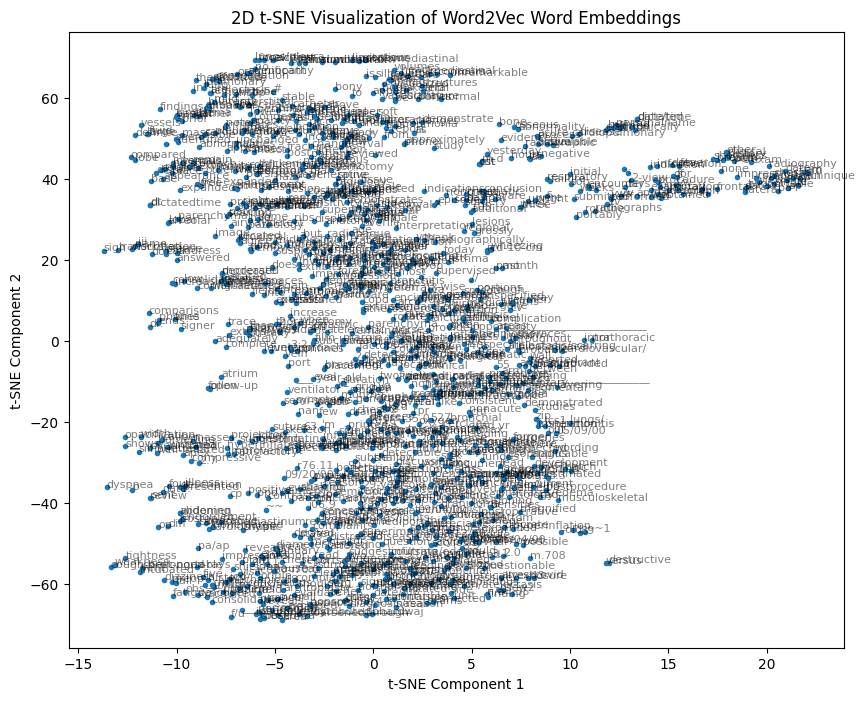

In [55]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('punkt')  # Download the punkt tokenizer

# Read data from CSV
df = pd.read_csv('open_ave_data.csv')

# Concatenate text from multiple columns into a single text column
df['combined_text'] = df['findings'].astype(str) + ' ' + df['clinicaldata'].astype(str) + ' ' + df['ExamName'].astype(str) + ' ' + df['impression'].astype(str)

# Tokenize the combined text data
tokenized_data = [word_tokenize(text.lower()) for text in df['combined_text']]
date_pattern = r'\b\d{2}/\d{2}/\d{4}\b'
time_pattern = r'\b\d{2}:\d{2}\b'
time_pattern2 = r'\b\d{1}:\d{2}\b'
time_pattern3 = r'\b\d{1,2}:\d{2}\b'

def remove_dates(text):
    text_without_dates = re.sub(date_pattern, '', text)
    text_without_times = re.sub(time_pattern, '', text_without_dates)
    text_without_times1 = re.sub(time_pattern2, '', text_without_times)
    text_without_times2 = re.sub(time_pattern3, '', text_without_times1)
    return text_without_times2

tokenized_data = [[remove_dates(text) for text in inner_list] for inner_list in tokenized_data]
#tokenized_data = [remove_dates(text) for text in tokenized_data]
print(tokenized_data)

word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

word_vector = word2vec_model.wv['lung']

# Find similar words to a given word
similar_words = word2vec_model.wv.most_similar('heart', topn=5)
print(similar_words)

words = list(word2vec_model.wv.index_to_key)

vectors = [word2vec_model.wv[word] for word in words]
vectors_np = np.array(vectors)
vectors_np.flatten()



tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(vectors_np)

df_2d = pd.DataFrame(data=word_vectors_2d, columns=['x', 'y'])
df_2d['word'] = words

plt.figure(figsize=(10, 8))
plt.scatter(df_2d['x'], df_2d['y'], marker='.')
for i, word in enumerate(df_2d['word']):
    plt.annotate(word, (df_2d['x'][i], df_2d['y'][i]), alpha=0.5, fontsize=8)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE Visualization of Word2Vec Word Embeddings')
plt.show()




In [56]:
def get_word2vec_embedding(document, model):
    # Filter out words that are not in the vocabulary
    words_in_vocab = [word for word in document if word in model.wv.key_to_index]
    if words_in_vocab:
        # Calculate the mean of Word2Vec vectors for words in the document
        return np.mean(model.wv[words_in_vocab], axis=0)
    else:
        # If no words in vocabulary, return a zero vector
        return np.zeros(model.vector_size)

# Example usage: Get Word2Vec embeddings for a list of tokenized documents
word2vec_embeddings = [get_word2vec_embedding(document, word2vec_model) for document in tokenized_data]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample labels (replace this with your own labels)
labels = [1, 0]  # Example labels, 1 for positive class, 0 for negative class

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_embeddings, labels, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [954, 2]